<a href="https://colab.research.google.com/github/OlhaZahrebelna/python_for_ds_task/blob/main/Zahrebelna_Olha_%22HW_2_1_%D0%9F%D0%BE%D0%B1%D1%83%D0%B4%D0%BE%D0%B2%D0%B0_%D0%BB%D1%96%D0%BD%D1%96%D0%B9%D0%BD%D0%BE%D1%97_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%97_%D0%B7%D0%B0_%D0%BE%D0%B4%D0%BD%D0%BE%D1%8E_%D0%BE%D0%B7%D0%BD%D0%B0%D0%BA%D0%BE%D1%8E_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдены параметри моделы близькими до ваших найкращих припущень?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

medical_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/date/medical-charges.csv') # замініть на ваш шлях до файлу
non_smoker_df = medical_df[medical_df.smoker == 'no']

Mounted at /content/drive/


In [3]:
non_smoker_df.head(3)

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061


In [4]:
non_smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1064 entries, 1 to 1336
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 66.5+ KB


Відсутніх значень в нас немає, тому можемо не використовувати non_smoker_df = non_smoker_df.dropna(subset=["age", "charges"])


In [5]:
# to_numpy create matrix
y = non_smoker_df["charges"].to_numpy().reshape(-1, 1)

X = non_smoker_df[["age"]].to_numpy()

X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]

In [6]:
def normal_equations(X, y):
    """Closed-form OLS solution for linear regression."""
    theta = np.linalg.pinv(X.T @ X) @ (X.T @ y)
    return theta


In [7]:
MNK_coefs = normal_equations(X_with_intercept, y)
MNK_coefs

array([[-2091.42055656],
       [  267.24891283]])

In [8]:
predictions_MNK = np.dot(X_with_intercept, MNK_coefs)

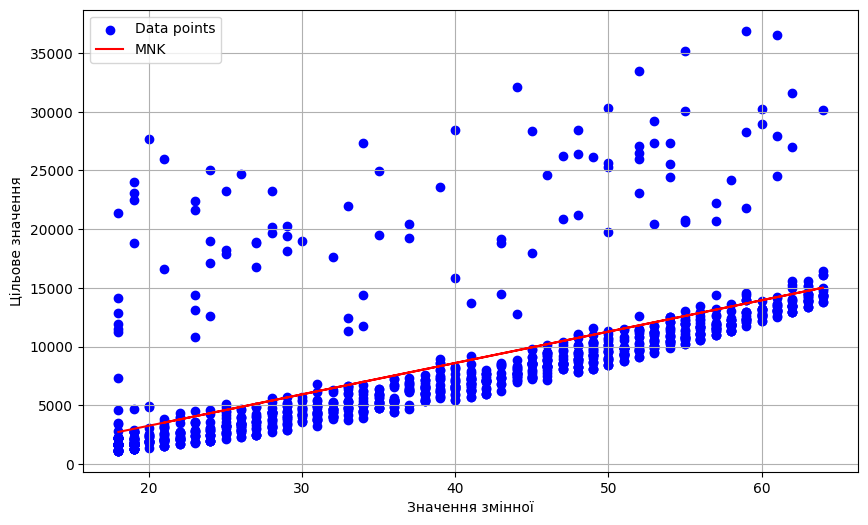

In [9]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

Бачимо загальний тренд зростання витрат із віком, але також видно значний розкид точок, тобто на витрати впливають і інші фактори.

In [10]:
def regression_metrics(y_true, y_pred):
    y_true = np.ravel(y_true).astype(float)  # (n,)
    y_pred = np.ravel(y_pred).astype(float)  # (n,)

    mse = np.mean((y_true - y_pred)**2)
    rmse = np.sqrt(mse)

    ss_res = np.sum((y_true - y_pred)**2)
    ss_tot = np.sum((y_true - y_true.mean())**2)
    r2 = 1 - ss_res/ss_tot

    return mse, rmse, r2

In [11]:
mse_mnk, rmse_mnk, r2_mnk = regression_metrics(y, predictions_MNK)
print("MSE:", mse_mnk)
print("RMSE:", rmse_mnk)
print("R2:", r2_mnk)

MSE: 21738960.02391763
RMSE: 4662.505766636395
R2: 0.3943171632425906


In [12]:
def full_batch_gradient_descent(X, y, lr=1e-7, epochs=20000000):
    x = X[:, 0].astype(float)
    y = np.ravel(y).astype(float)

    m, b = 0.0, 0.0
    n = y.size
    errors = []

    for _ in range(epochs):
        y_pred = m * x + b
        error = y_pred - y

        errors.append(np.mean(error**2))   # MSE для контролю

        m_gradient = (2/n) * np.dot(error, x)
        b_gradient = (2/n) * np.sum(error)

        m -= lr * m_gradient
        b -= lr * b_gradient

    return m, b, errors

m, b, errors = full_batch_gradient_descent(X, y, lr=1e-7, epochs=20000)
predictions_fbgd = m * X[:, 0] + b


In [13]:
predictions_fbgd

array([3961.64203591, 6160.33158941, 7259.67636616, ..., 3961.64203591,
       3961.64203591, 4621.24890196])

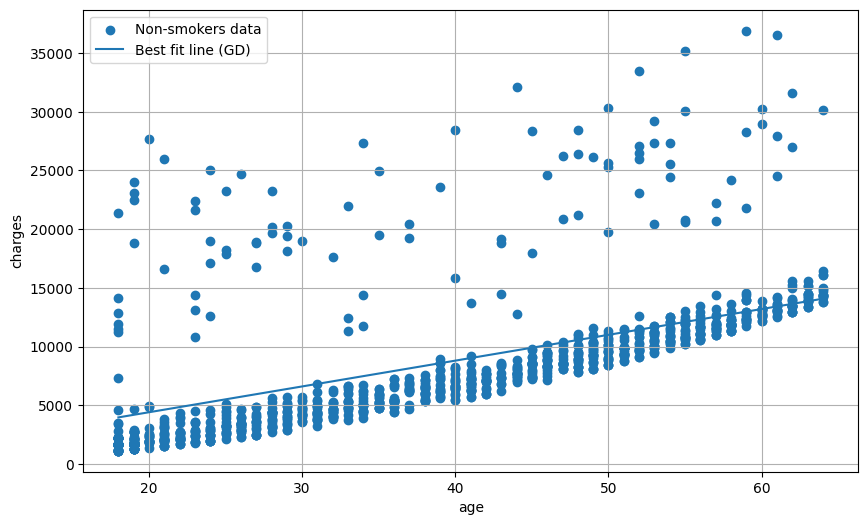

In [14]:
x = X[:, 0]
y1d = np.ravel(y)

y_pred = m * x + b

order = np.argsort(x)

plt.figure(figsize=(10, 6))
plt.scatter(x, y1d, label="Non-smokers data")
plt.plot(x[order], y_pred[order], label="Best fit line (GD)")
plt.xlabel("age")
plt.ylabel("charges")
plt.grid(True)
plt.legend()
plt.show()

In [15]:
lrs = [1e-6, 5e-7, 1e-7]
results = []

for lr in lrs:
    m_lr, b_lr, errors_lr = full_batch_gradient_descent(X, y, lr=lr, epochs=20000)
    preds_lr = m_lr * X[:, 0] + b_lr

    mse_lr, rmse_lr, r2_lr = regression_metrics(y, preds_lr)
    results.append((lr, m_lr, b_lr, rmse_lr, r2_lr, errors_lr))

    print(f"lr={lr: .1e} | m={m_lr:.6f} | b={b_lr:.6f} | RMSE={rmse_lr:.2f} | R2={r2_lr:.4f}")


lr= 1.0e-06 | m=220.261071 | b=-4.517759 | RMSE=4715.11 | R2=0.3806
lr= 5.0e-07 | m=220.154555 | b=0.213012 | RMSE=4715.35 | R2=0.3805
lr= 1.0e-07 | m=219.868955 | b=4.000840 | RMSE=4715.55 | R2=0.3805


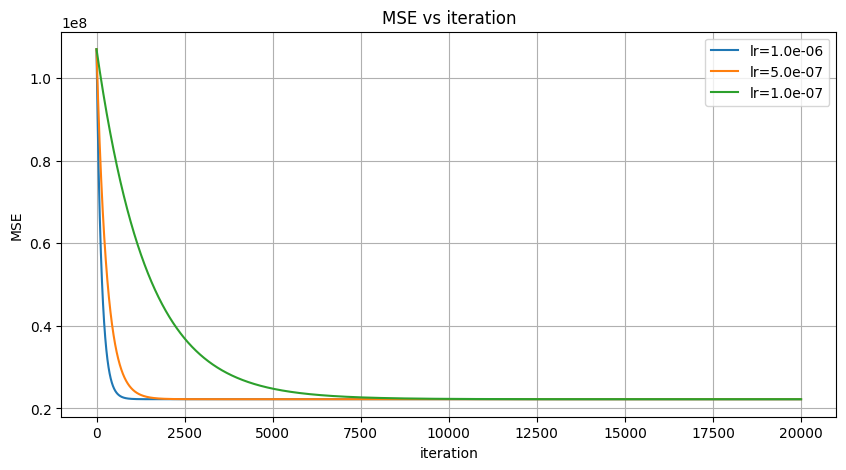

In [19]:
plt.figure(figsize=(10,5))
for lr, m_lr, b_lr, rmse_lr, r2_lr, errors_lr in results:
    plt.plot(errors_lr, label=f"lr={lr:.1e}")
plt.title("MSE vs iteration")
plt.xlabel("iteration")
plt.ylabel("MSE")
plt.grid(True)
plt.legend()
plt.show()



Було протестовано 3 значення learning rate: 1e-6, 5e-7, 1e-7.
За графіком MSE vs iteration видно, що всі три варіанти збіжні (помилка монотонно зменшується і виходить на плато), але:
більший lr (1e-6) сходиться швидше,
менший lr (1e-7) сходиться повільніше.
За значенням RMSE найкращим серед протестованих виявився lr = 1e-6 (дає найменший RMSE із трьох), тому саме його доцільно обирати як “best” у рамках цього експерименту

In [20]:
mse_gd,  rmse_gd,  r2_gd  = regression_metrics(y, predictions_fbgd)
print("MSE:", mse_gd)
print("RMSE:", rmse_gd)
print("R2:", r2_gd)

MSE: 22236392.1015697
RMSE: 4715.547911067143
R2: 0.380457895294402


In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
predictions_sklearn = lin_reg.predict(X)

In [22]:
lin_reg.coef_, lin_reg.intercept_

(array([[267.24891283]]), array([-2091.42055657]))

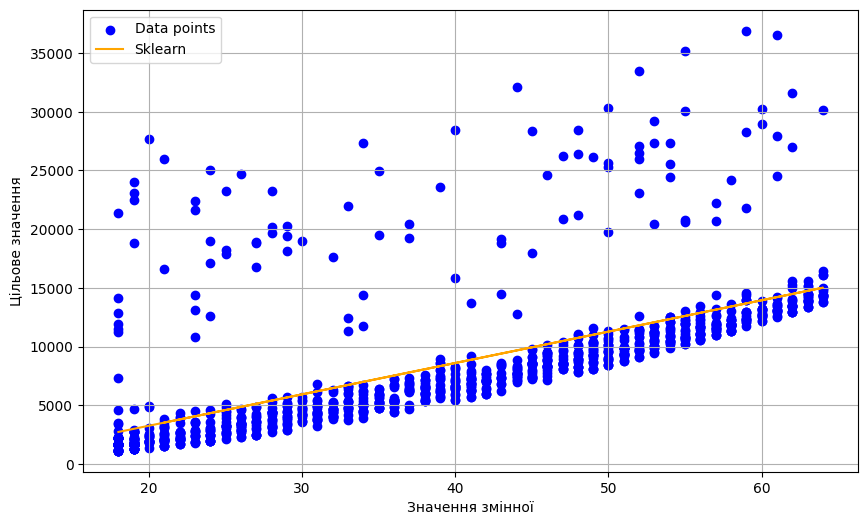

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_sklearn, color='orange', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

In [24]:
mse_sklearn, rmse_sklearn, r2_sklearn = regression_metrics(y, predictions_sklearn)
print("MSE:", mse_sklearn)
print("RMSE:", rmse_sklearn)
print("R2:", r2_sklearn)

MSE: 21738960.023917634
RMSE: 4662.505766636395
R2: 0.3943171632425906


Метод МНК і sklearn.LinearRegression дали однакові коефіцієнти (slope та intercept збігаються).
Також співпали і метрики якості:
RMSE ≈ 4662.5
R² ≈ 0.394

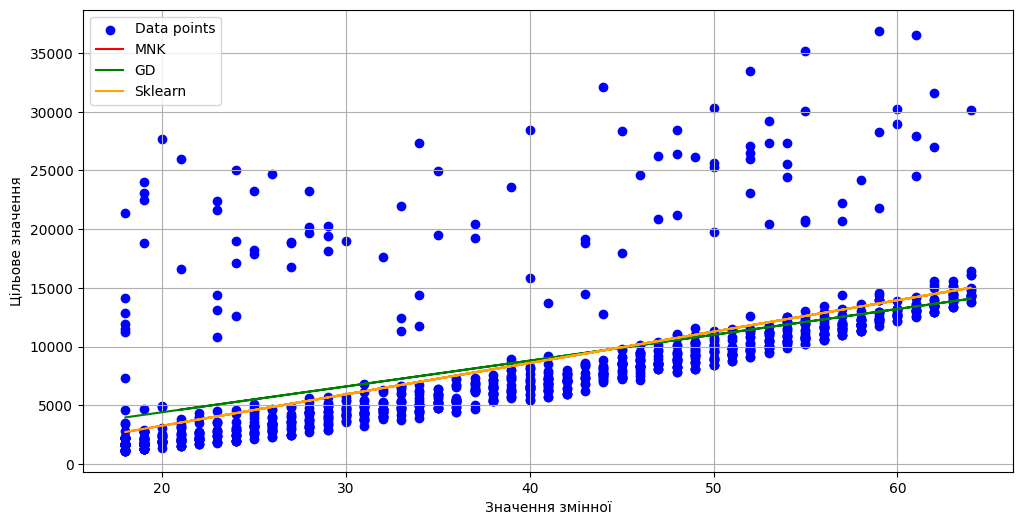

In [25]:
plt.figure(figsize=(12, 6))
plt.scatter(X[:, 0], y, color='blue', label='Data points')
plt.plot(X[:, 0], predictions_MNK, color='red', label='MNK')
plt.plot(X[:, 0], predictions_fbgd, color='green', label='GD')
plt.plot(X[:, 0], predictions_sklearn, color='orange', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.grid(True)
plt.show()

MNK та sklearn дають найкращий результат — це очікувано, бо обидва мають однакову логіку.
Gradient Descent дав трохи гірші метрики (RMSE трохи більше, R² трохи менше), що пояснюється тим, що GD є ітеративним методом і за задану кількість епох навчання може не дійти до точного оптимуму так само близько, як closed-form МНК.
На спільному графіку видно, що лінії MNK і sklearn збігаються, а лінія GD знаходиться дуже близько до них, але може мати невелике зміщення.


Висновок:

Знайдені параметри моделі підтверджують інтуїтивне припущення: у некурців із віком середні витрати зростають (позитивний кутовий коефіцієнт).
Водночас R² ~ 0.39 показує, що вік пояснює лише частину варіації у charges, тому для суттєво кращих прогнозів потрібна багатофакторна модель (додати хоча б BMI/children тощо).

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [27]:
smoker_df = medical_df[medical_df.smoker == 'yes']
smoker_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
11,62,female,26.29,0,yes,southeast,27808.7251
14,27,male,42.13,0,yes,southeast,39611.7577
19,30,male,35.30,0,yes,southwest,36837.4670
23,34,female,31.92,1,yes,northeast,37701.8768


In [28]:
smoker_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 274 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 17.1+ KB


In [29]:
y_s = smoker_df["charges"].to_numpy().reshape(-1, 1)

X_s = smoker_df[["age"]].to_numpy()

X_with_intercept_s = np.c_[np.ones((X.shape[0], 1)), X]

In [30]:
lin_reg_s = LinearRegression()
lin_reg_s.fit(X_s, y_s)
predictions_sklearn_s = lin_reg_s.predict(X_s)

In [32]:
mse_s, rmse_s, r2_s = regression_metrics(y_s, predictions_sklearn_s)

In [33]:
print("MSE:", mse_s)
print("RMSE:", rmse_s)
print("R2:", r2_s)

MSE: 114725592.72306103
RMSE: 10711.00334810241
R2: 0.13558924096084068


R² ≈ 0.136 — дуже слабка модель(вік пояснює лише ~14% розкиду charges).
RMSE ≈ 10.7k — типова помилка прогнозу дуже велика у грошах.

In [35]:
slope = lin_reg_s.coef_[0]
intercept = lin_reg_s.intercept_

print("intercept (b):", intercept)
print("slope (m):    ", slope)
print(f"Лінія: charges ≈ {intercept[0]:.2f} + {slope[0]:.2f} * age")

intercept (b): [20294.12812692]
slope (m):     [305.23760211]
Лінія: charges ≈ 20294.13 + 305.24 * age


Intercept ~ 20294 — умовний базовий рівень витрат (математична точка перетину, не буквальна “вартість у 0 років”).
Slope ~ 305 — у середньому витрати ростуть приблизно на $305 за кожен додатковий рік віку (за інших умов).


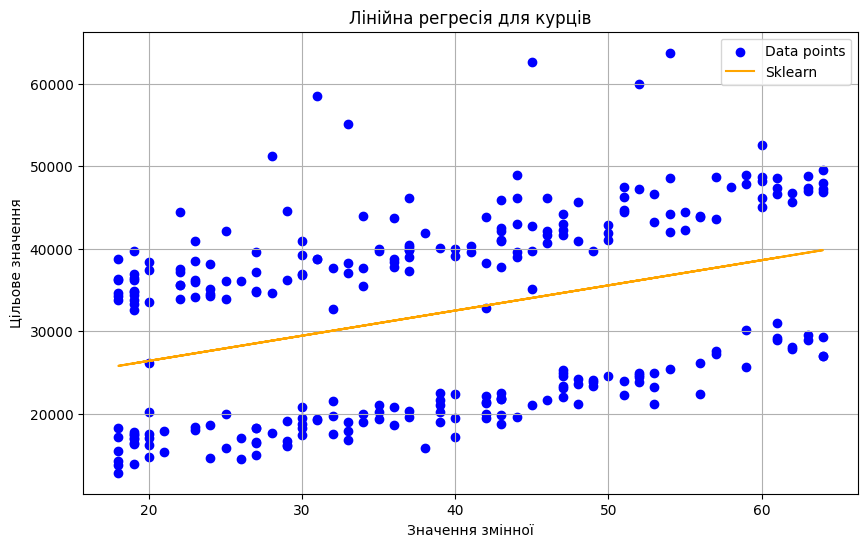

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X_s[:, 0], y_s, color='blue', label='Data points')
plt.plot(X_s[:, 0], predictions_sklearn_s, color='orange', label='Sklearn')
plt.xlabel('Значення змінної')
plt.ylabel('Цільове значення')
plt.legend()
plt.title('Лінійна регресія для курців')
plt.grid(True)
plt.show()

На scatter-графіку для курців видно два різні “рівні” витрат (дві смуги/кластери). Це означає, що популяція курців неоднорідна: є ще один(кілька) сильних факторів, які ділять людей на групи з різними витратами.
Найімовірніше це BMI (і, додатково, інші змінні). Через це одна пряма по age вимушено “усереднює” два режими й не потрапляє точно ні в один. Не рекомендую використовувати цю модель, без додавання додаткових ознак і перерівки точності моделі.


### Загальний висновок:

Для некурців моделі МНК і sklearn дали однакову пряму та однакові метрики. Градієнтний спуск дав близькі результати, але трохи гіршу помилку, що пояснюється неповною збіжністю і залежністю від learning rate. Для курців лінійна модель за одним віком показує позитивний тренд (charges ростуть із віком), але через наявність двох груп витрат та вплив інших факторів має низьке R² і високу RMSE, тому її не варто використовувати в компанії без розширення набору ознак.